# TensorFlow: an Intro

0 [ 0.35465255] [ 0.22482662]
20 [ 0.17059486] [ 0.265163]
40 [ 0.12124172] [ 0.2895177]
60 [ 0.10639156] [ 0.29684591]
80 [ 0.1019232] [ 0.29905096]
100 [ 0.1005787] [ 0.29971445]
120 [ 0.10017413] [ 0.29991409]
140 [ 0.10005239] [ 0.29997414]
160 [ 0.10001576] [ 0.29999223]
180 [ 0.10000473] [ 0.29999769]
200 [ 0.10000142] [ 0.2999993]


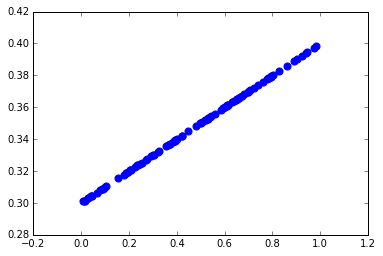

In [19]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

#print (x_data)
for x, y in zip(x_data, y_data):
    plt.scatter(x, y, marker='o', s=50, color='b')

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but TensorFlow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.initialize_all_variables()

# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

# Learns best fit is W: [0.1], b: [0.3]
plt.show()
#print (y, W, b)

#not sure if this step is necessary.... 
sess.close()

## MNIST For ML Beginners

In [1]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""A very simple MNIST classifier.
See extensive documentation at
http://tensorflow.org/tutorials/mnist/beginners/index.md
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Import data
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

flags = tf.app.flags
FLAGS = flags.FLAGS
flags.DEFINE_string('data_dir', '/tmp/data/', 'Directory for storing data')

mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

sess = tf.InteractiveSession()

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Train
tf.initialize_all_variables().run()
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  train_step.run({x: batch_xs, y_: batch_ys})

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('accuracy =:', accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
accuracy =: 0.9188
